# **Trend Setters - Data Science with Spotify**
##### By: Daya Novich and Naomi Rosenbaum

### **Step 1: Setup & Imports**
##### By importing various libraries from Python, we are able to do various manipulation of date such as converting files from JSON to CSV, using seaborn, matplotlib, and statsmodels to visulalize data and verify hypothesis.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import warnings
import json
import csv

### **Step 2: Data Processing**
##### We first start by creating a JSON file of the gathered information on top spotify songs, we created a JSON file using Firebase.Then we converted it into a CSV file, allowing us to then create our first dataframe.
##### For each song we list the Title, Artist, Duration (in seconds), if its Explicit, Genre, and Streams (in millions) number at time of data collection.

In [48]:
with open('spotifyDB.json') as json_file:
    data = json.load(json_file)


titles = data['Songs']

data_file = open('spotifyDB.csv', 'w')
csv_writer = csv.writer(data_file)
csv_writer.writerow(titles[0].keys())
for title in titles:
    csv_writer.writerow(title.values())
data_file.close()



### **Step 3: Data Integration**


##### After converting our original dataset to a csv file, we can finally begin our data processing. We created our database to begin the integration process. Because we created the database, there wasn't much cleaning that needed to be done to integrate our data. 


In [49]:
df = pd.read_csv('spotifyDB.csv', dtype='str', error_bad_lines=False)
df


/var/folders/t_/twf8s6q91kn5v32pz5_9fglh0000gn/T/ipykernel_38086/808744729.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('spotifyDB.csv', dtype='str', error_bad_lines=False)


,Title,Artist,Duration,Explicit,Genre,Streams
0,As It Was,Harry Styles,147,False,"Pop, Soft Pop, Rock",214
1,Bad Habits,Ed Sheeran,231,False,"Alternative Indie, Pop",1040
2,Bam Bam,"Camila Cabello, Ed Sheeran",206,False,"French Urban Pop, R&B, Soul, Pop",116
3,Better Days,"NEIKED, Mae Muller, Polo G",161,False,"Disco, Pop, Funk",217
4,Bones,Imagine Dragons,165,False,"Alternative, Indie",51
5,Boyfriend,Dove Cameron,153,True,"R&B, Soul, Pop",145
6,Cold Heart,"Elton John, Dua Lipa, PNAU",203,False,"Disco, Pop",796
7,Desesperados,"Rauw Alejandro, Chencho Corleone",225,True,Latin Urbano,280
8,Easy On Me,Adele,225,False,"Pop, Soul",851
9,Enemy,"Imagine Dragons, JID, Arcane, League of Legends",173,False,"Alternative Indie, Pop, Hip-Hop, Rap, R&B, Soul",592


##### We wanted to see the correlation between a the number of streams and duration of a song based on Spotify's Today Top 50 Hits. We began by making two dataframes one consisting of clean songs and the other with explicit songs, to determine if the correlation between the streams and duration of the song differed if the song was explicit or not. 

In [52]:
dfC = df.loc[df['Explicit'].str.contains('False')]
dfC

,Title,Artist,Duration,Explicit,Genre,Streams
0,As It Was,Harry Styles,147,False,"Pop, Soft Pop, Rock",214
1,Bad Habits,Ed Sheeran,231,False,"Alternative Indie, Pop",1040
2,Bam Bam,"Camila Cabello, Ed Sheeran",206,False,"French Urban Pop, R&B, Soul, Pop",116
3,Better Days,"NEIKED, Mae Muller, Polo G",161,False,"Disco, Pop, Funk",217
4,Bones,Imagine Dragons,165,False,"Alternative, Indie",51
6,Cold Heart,"Elton John, Dua Lipa, PNAU",203,False,"Disco, Pop",796
8,Easy On Me,Adele,225,False,"Pop, Soul",851
9,Enemy,"Imagine Dragons, JID, Arcane, League of Legends",173,False,"Alternative Indie, Pop, Hip-Hop, Rap, R&B, Soul",592
10,Envolver,Anitta,194,False,"Reggaeton, Latin Urbano",167
11,Fingers Crossed,Lauren Spencer-Smith,175,False,Pop,152


In [50]:
dfE = df.loc[df['Explicit'].str.contains('True')]
dfE

,Title,Artist,Duration,Explicit,Genre,Streams
5,Boyfriend,Dove Cameron,153,True,"R&B, Soul, Pop",145
7,Desesperados,"Rauw Alejandro, Chencho Corleone",225,True,Latin Urbano,280
12,First Class,Jack Harlow,174,True,"Hip-Hop, Rap",799
14,Go,Cat Burns,215,True,Pop,40
15,Happier Than Ever - Edit,Billie Eilish,151,True,"Alternative Indie, Pop",197
18,IDGAF,"BoyWithUke, blackbear",141,True,"Alternative Indie, Hip-Hop, Rap",37
19,In My Head,Lil Tjay,135,True,"Hip-Hop, Rap",36
20,Industry Baby,"Lil Nas X, Jack Harlow",212,True,"Hip-Hop, Rap",12132
27,Nail Tech,Jack Harlow,206,True,"Hip-Hop, Rap",73
28,Need to Know,Doja Cat,211,True,"R&B Soul, Pop, Rap",707


### Data Visualization

##### We then created a couple graphs to help us determine the correlation between the duration of a song (in seconds) and the number of streams a song has. Obviously there are many other factors that come in to play, but we wanted to explore the correlation specifically within Today's Top Hits on Spotify. 

TypeError: can only concatenate str (not "float") to str

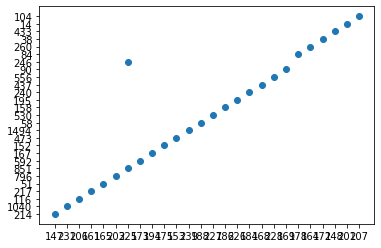

In [55]:
df[['Duration']].astype(int)
df[['Streams']].astype(int)

duration = 'Duration'
streams = 'Streams'

plt.plot(duration, streams, data = dfC, linestyle = 'none', marker = 'o')

m, b = np.polyfit(dfC[duration], dfC[streams], 1)

plt.plot(dfC[duration], m * dfC[duration] + b)


TypeError: can only concatenate str (not "float") to str

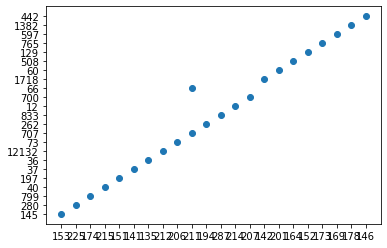

In [56]:
plt.plot(duration, streams, data = dfE, linestyle = 'none', marker = 'o')

m, b = np.polyfit(dfE[duration], dfE[streams], 1)

plt.plot(dfE[duration], m * dfE[duration] + b)

In [ ]:
# donut pie graph
plt.pie(df_sorted_genres)

my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show

##### Based on these graphs we could conclude that there was a correlation - songs in the pop genre seem to be most streamed at the moment. 

### Data Validation

###### Null Hypothesis -
##### Alternate Hypothesis - 


In [ ]:
x = df[['Streams']]
y = df[['Genre']]
regression = sm.OLS(x, y)
results = regression.fit()
print(results.summary())